In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats 
import math as m

In [2]:
#Part 1a)
class frequentist:
        
    def beta(N_obs,mean):
        """This function calculates the probability of a type 2 error (beta) via Frequentist statistics"""
        total = 0
        for n in range(N_obs+1): # +1 to include N_obs
            total += stats.poisson.pmf(n,mean) # Sum up the poissonian pmf
            
        return total

In [3]:
#Part 1b)

# Define the starting values
n_b = np.arange(0,15,0.1)
n_s_upp = np.arange(0,15,0.1)
N_obs = 6
values = []

closest = 1 # Start with furthest possible value from 0.05
total = 0

#This for loop goes from 0-300 in integer steps (i.e., from 10*min(n_b+n_s) to 10*max(n_b+n_s)) 
for i in range(len(n_b)+len(n_s_upp)):
    mean = float(i)/10. # Convert to float from 0-30 in steps of 0.1
    b = frequentist.beta(N_obs,mean) # Calculate beta value
    if abs(b-0.05) < abs(closest-0.05): # Checks if value is closer to 0.05 than current closest value
        closest = b # Updates closest value
        total = mean # Rewrites the mean corresponding to the closest value
        
# This for loop finds all combinations of n_b & n_s that sum to the best mean
for i in n_b:
    for j in n_s_upp:
        if i+j == total:
            values.append([i,j]) #adds them to the list
    
        
print(np.asarray(values)) # These values behave as expected

[[ 0.  11.8]
 [ 0.1 11.7]
 [ 0.2 11.6]
 [ 0.3 11.5]
 [ 0.4 11.4]
 [ 0.5 11.3]
 [ 0.6 11.2]
 [ 0.7 11.1]
 [ 0.8 11. ]
 [ 0.9 10.9]
 [ 1.  10.8]
 [ 1.1 10.7]
 [ 1.2 10.6]
 [ 1.3 10.5]
 [ 1.4 10.4]
 [ 1.5 10.3]
 [ 1.6 10.2]
 [ 1.7 10.1]
 [ 1.8 10. ]
 [ 1.9  9.9]
 [ 2.   9.8]
 [ 2.1  9.7]
 [ 2.2  9.6]
 [ 2.3  9.5]
 [ 2.4  9.4]
 [ 2.5  9.3]
 [ 2.6  9.2]
 [ 2.7  9.1]
 [ 2.8  9. ]
 [ 2.9  8.9]
 [ 3.   8.8]
 [ 3.1  8.7]
 [ 3.2  8.6]
 [ 3.3  8.5]
 [ 3.4  8.4]
 [ 3.5  8.3]
 [ 3.6  8.2]
 [ 3.7  8.1]
 [ 3.8  8. ]
 [ 3.9  7.9]
 [ 4.   7.8]
 [ 4.1  7.7]
 [ 4.2  7.6]
 [ 4.3  7.5]
 [ 4.4  7.4]
 [ 4.5  7.3]
 [ 4.6  7.2]
 [ 4.7  7.1]
 [ 4.8  7. ]
 [ 4.9  6.9]
 [ 5.   6.8]
 [ 5.1  6.7]
 [ 5.2  6.6]
 [ 5.3  6.5]
 [ 5.4  6.4]
 [ 5.5  6.3]
 [ 5.6  6.2]
 [ 5.7  6.1]
 [ 5.8  6. ]
 [ 5.9  5.9]
 [ 6.   5.8]
 [ 6.1  5.7]
 [ 6.2  5.6]
 [ 6.3  5.5]
 [ 6.4  5.4]
 [ 6.5  5.3]
 [ 6.6  5.2]
 [ 6.7  5.1]
 [ 6.8  5. ]
 [ 6.9  4.9]
 [ 7.   4.8]
 [ 7.1  4.7]
 [ 7.2  4.6]
 [ 7.3  4.5]
 [ 7.4  4.4]
 [ 7.5  4.3]
 [ 7.6  4.2]

In [4]:
# Part 1c)

values = []

#This for loop is the same as for part b but with an added loop over different N_obs
for k in range(N_obs+1):
    closest = 1
    total = 0
    for i in range(len(n_b)+len(n_s_upp)):
        mean = float(i)/10.
        b = frequentist.beta(k,mean)
        if abs(b-0.05) < abs(closest-0.05):
            closest = b
            total = mean
        
    l = []
    for i in n_b:
        for j in n_s_upp:
            if i+j == total:
                l.append([i,j]) # Append to list for specific value of N_obs
    values.append(l) # Append values to big list for all N_obs

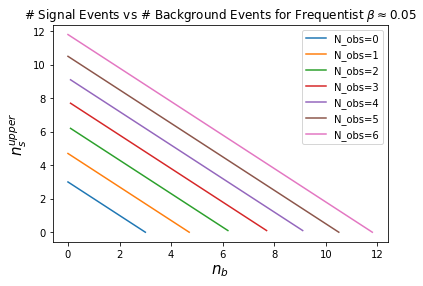

In [5]:
for i in range(N_obs+1):
    # Plot for different N_obs
    plt.plot(np.asarray(values[i])[:,0],np.asarray(values[i])[:,1],label="N_obs={:}".format(i))

plt.legend()
plt.title(r"# Signal Events vs # Background Events for Frequentist $\beta\approx 0.05$")
plt.xlabel("$n_b$",fontsize=15)
plt.ylabel("$n^{upper}_s$",fontsize=15)
plt.show()

These are straight lines with a negative gradient implying that as the background gets higher, then fewer signal events are required to be observed for a type 2 error to have a ~5% probability of occurring. This is expected, as the signal gets more obscured the higher the background so, in order to make type 2 error, the actual signal must therefore decrease when the background increases and vice versa.  

# Part 2

In [6]:
class bayesian:
    
    def beta(N_obs,n_s,n_b):
        """This function calculates the probability of a type 2 error (beta) via Bayesian statistics"""
        s1 = 0
        s2 = 0
        for i in range(N_obs+1):
            s1 += ((n_s+n_b)**i)/m.factorial(i)
            s2 += ((n_b)**i)/m.factorial(i)
            
        return np.exp(-n_s)*(s1/s2) # Return the equation for beta given by Bayesian statistics

In [7]:
values_b = []

# Use the same starting values defined in part 1b)
for i in n_b:
    closest_b = 1
    n_s_best = -1 # Pick an absurd value for best n_s to check for errors
    for j in n_s_upp:
        b = bayesian.beta(N_obs,j,i) # calculate beta
        if abs(b-0.05) < abs(closest_b-0.05): # find beta closest to 0.05
            closest_b = b # Replace closest value
            n_s_best = j # Replace best n_s value corresponding to current n_b
    
    values_b.append([i,n_s_best]) # Append the n_b with best n_s value

In [8]:
values_b = []

# Do same as above but with loop over N_obs
for k in range(N_obs+1):
    l = []
    for i in n_b:
        closest_b = 1
        n_s_best = -1
        for j in n_s_upp:
            b = bayesian.beta(k,j,i)
            if abs(b-0.05) < abs(closest_b-0.05):
                closest_b = b
                n_s_best = j
    
        l.append([i,n_s_best]) # Append to list for specific value of N_obs
    values_b.append(l) # Append values to big list for all N_obs

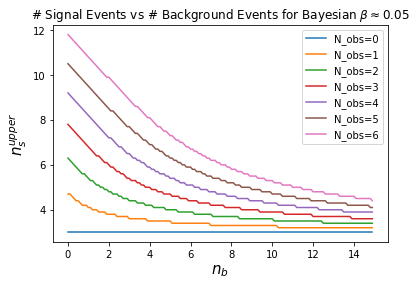

In [9]:
for i in range(N_obs+1):
    # Plot for different N_obs
    plt.plot(np.asarray(values_b[i])[:,0],np.asarray(values_b[i])[:,1],label="N_obs={:}".format(i))

plt.legend()
plt.title(r"# Signal Events vs # Background Events for Bayesian $\beta\approx0.05$")
plt.xlabel("$n_b$",fontsize=15)
plt.ylabel("$n^{upper}_s$",fontsize=15)
plt.show()

Comparing the two graphs, the lines are straighter for the frequentist graph than for the bayesian graph. This implies that the Bayesian beta is more conservative than the frequentist one as a lower background to signal ratio is required to get the same beta value.

# Part 3

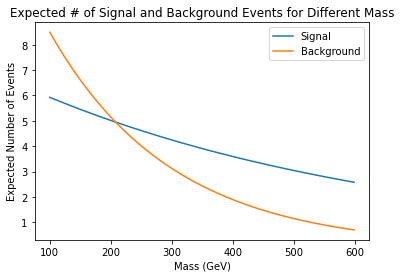

In [10]:
# Part a)

# Define starting parameters
mass = np.arange(100,600,1) # Gev
s = 7.
b = 14.
l_back = 1./200.
l_sig = 1./600.

# Signal and background curves
signal = s*np.exp(-l_sig*mass)
background = b*np.exp(-l_back*mass)

plt.plot(mass,signal,label='Signal')
plt.plot(mass,background,label='Background')
plt.xlabel("Mass (GeV)")
plt.ylabel("Expected Number of Events")
plt.title("Expected # of Signal and Background Events for Different Mass")
plt.legend()
plt.show()

At a mass lower than 200 GeV, the background outweighs the signal whereas at a mass greater than 200 GeV, the signal is better than the background.

In [11]:
# b)

def likelihood(n,n_s,n_b):  
    """This function returns the test statistic for the situations in which there is signal and one with only background"""
    t1 = []
    t2 = []
    
    for i in range(n):
        z_sig = np.random.poisson(n_s+n_b) # Pull a number from poisson dist. with signal+background as mean
        LH1_sig = stats.poisson.pmf(z_sig,n_s+n_b) # Probability of H1 hypothesis correct with z_sig
        LH0_sig = stats.poisson.pmf(z_sig,n_b) # Probability of H0 hypothesis correct with z_sig
        frac_sig = LH1_sig/LH0_sig
        
        z_back = np.random.poisson(n_b) # Pull a number from poisson dist. with only background as mean
        LH1_back = stats.poisson.pmf(z_back,n_s+n_b) # Probability of H1 hypothesis correct with z_back
        LH0_back = stats.poisson.pmf(z_back,n_b) # Probability of H0 hypothesis correct with z_back
        frac_back = LH1_back/LH0_back
        
        t1.append(-2*np.log(frac_sig)) # test statistic for H1 model
        t2.append(-2*np.log(frac_back)) # test statistic for H0 model
        
    return t1,t2

In [12]:
n = 2000 # Do 2000 pseudo-experiments
m = 300 #GeV
n_s = s*np.exp(-l_sig*m)
n_b = b*np.exp(-l_back*m) 

t_backwsignal,t_back = likelihood(n,n_s,n_b) # Find t values 

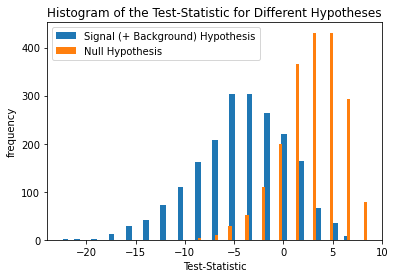

In [13]:
# Drawing histograms and getting the values in arrays
H1_n, H1_bins,p = plt.hist(t_backwsignal,bins=50,label="Signal (+ Background) Hypothesis")
H0_n, H0_bins,p = plt.hist(t_back,bins=50,label="Null Hypothesis")
plt.title("Histogram of the Test-Statistic for Different Hypotheses")
plt.xlabel("Test-Statistic")
plt.ylabel("frequency")
plt.legend()
plt.show()

In [14]:
# Part c)

t_obs_threshold = H0_bins[np.argmax(H0_n)] # Define the test threshold as most popular bin
CL_sb_w = 0 
CL_b_wrong = 0 # (This is labelled as "wrong" because it is, in fact, 1-CL_b)

# Loop over H1
for i in range(len(H1_n)): 
    if H1_bins[i] > t_obs_threshold: #Add values above t_threshold
        CL_sb_w += H1_n[i]
    if H1_bins[i] == t_obs_threshold:
        CL_sb_w += H1_n[i]/2. # Add only half of the values equal to the threshold

# Loop over H0
for i in range(len(H0_n)): 
    if H0_bins[i] < t_obs_threshold: #Add values below t_threshold
        CL_b_wrong += H0_n[i]
    if H0_bins[i] == t_obs_threshold:
        CL_b_wrong += H0_n[i]/2. # Add only half of the values equal to the threshold
    
CL_b = 1-(CL_b_wrong/np.sum(H0_n)) # Calculate correct CL_b and normalise by dividing by total # of H0 values
CL_sb = CL_sb_w/np.sum(H1_n) # Normalise CL_sb by dividing by total # of H1 values

CL_s = CL_sb/CL_b # Calculate CL_s

print("Value for CL_s = {:.4f}".format(CL_s))

Value for CL_s = 0.1069


In [15]:
# Part d)

# Redefine variables to remove any possible definition errors
s = 7.
b = 14.
l_back = 1./200.
l_sig = 1./600.
n = 2000
m_d = np.arange(200,620,20) #GeV -- range of mass values from 200-600 GeV in steps of 20 GeV
n_s_d = s*np.exp(-l_sig*m_d)
n_b_d = b*np.exp(-l_back*m_d) 

t_backwsignal_d = []
t_back_d = []

#Calculate test values for each mass
for i in range(len(m_d)):
    x,y = likelihood(n,n_s_d[i],n_b_d[i])
    t_backwsignal_d.append(x)
    t_back_d.append(y)

In [16]:
H1_n_d = []
H1_bins_d = []
H0_n_d = []
H0_bins_d = []

#loop over all masses
for i in range(len(m_d)):
    a,b,c = plt.hist(t_backwsignal_d[i],bins=50) # define dummy variables for n,bins and p, respectively
    d,e,f = plt.hist(t_back_d[i],bins=50) # define dummy variables for n,bins and p, respectively
    
    # Append the variables to corresponding lists
    H1_n_d.append(a)
    H1_bins_d.append(b)
    H0_n_d.append(d)
    H0_bins_d.append(e)

plt.clf() # Hide the plot (it looks ugly)

<Figure size 432x288 with 0 Axes>

In [17]:
CL_s_d = []

# This is the same as part c) except we loop over the particle mass
for i in range(len(m_d)):
    t_obs_threshold = H0_bins_d[i][np.argmax(H0_n_d[i])] # Define the test threshold as most popular bin (for each mass)
    CL_sb_w = 0
    CL_b_wrong = 0

    # Loop over H1
    for j in range(len(H1_n_d[i])): 
        if np.asarray(H1_bins_d)[i,j] > t_obs_threshold: #Add values above t_threshold
            CL_sb_w += np.asarray(H1_n_d)[i,j]
        if np.asarray(H1_bins_d)[i,j] == t_obs_threshold:
            CL_sb_w += np.asarray(H1_n_d)[i,j]/2. # Add only half of the values
    
    # Loop over H0
    for j in range(len(H0_n_d[i])): 
        if np.asarray(H0_bins_d)[i,j] < t_obs_threshold: #Add values below t_threshold
            CL_b_wrong += np.asarray(H0_n_d)[i,j]
        if np.asarray(H0_bins_d)[i,j] == t_obs_threshold:
            CL_b_wrong += np.asarray(H0_n_d)[i,j]/2. # Add only half of the values
    
    CL_b = 1-(CL_b_wrong/np.sum(H0_n_d[i]))
    CL_sb = CL_sb_w/np.sum(H1_n_d[i])

    CL_s_d.append(CL_sb/CL_b) # Append to array the CL_s values for each mass

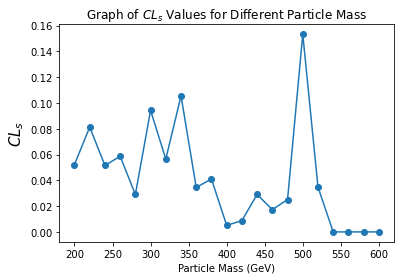

In [18]:
# Plot the CL_s values as a function of particle masses

plt.scatter(m_d,CL_s_d)
plt.plot(m_d,CL_s_d)
plt.title("Graph of $CL_s$ Values for Different Particle Mass")
plt.xlabel("Particle Mass (GeV)")
plt.ylabel("$CL_s$",fontsize=15)
plt.show()

This graph shows that the $H_1$ hypothesis can be ruled out for masses corresponding to where $CL_s<0.05$. If the particle has a mass near the peaks, the experiment won't be able to rule out the H1 hypothesis (i.e., that there is no signal amongst the background). 